提到分类模型评估相信大家应该都不会觉得陌生（不陌生你点进来干嘛[捂脸]），本文就分类模型评估的基本原理进行讲解，并手把手、肩并肩地带您实现各种评估函数。完整实现代码请参考本人的p...哦不是...github：  
- [model_selection.py](https://github.com/tushushu/imylu/blob/master/imylu/utils/model_selection.py)

## 1. 分类模型
分类问题其实在生活中处处可见，比如我们在大街上看妹纸，会把妹纸的外貌分为好看和非常好看(求生欲。。。)；再比如我们刷微博，会把微博推送给我们的内容分为喜欢的和不喜欢的。上述问题就是典型的分类问题，确切的说是二分类问题，而能够解决这些二分类问题的数学模型就被称为二分类模型。用数学的方式表达就是，给定自变量X，代入到我们的分类模型F，会输出因变量y，y的取值为0或1，其中0代表负样本（好看的妹纸、不喜欢的微博），1代表正样本（非常好看的妹纸、喜欢的微博）。

## 2. 准确率
如何评估一个分类模型计算出来的结果是否准确呢？最简单的方式就是用准确率(Accuracy)来评价。比如我们手机上有5条微博，我们对这5条微博的态度分别是喜欢、喜欢、不喜欢、不喜欢、喜欢，用数组表示就是y = [1, 1, 0, 0, 1]。我们将微博的文字内容，图片内容等特征X代入到分类模型F中，得到分类结果是y_hat = [1, 1, 0, 0, 0]。显然5个样本中我们正确分类了4个，准确率 = 4 / 5 * 100% = 80%。用Python实现计算准确率的函数如下:

In [43]:
def get_acc(y, y_hat):
    return sum(yi == yi_hat for yi, yi_hat in zip(y, y_hat)) / len(y)

## 3. 准确率的陷阱
如果用准确率就足以评估分类模型的优劣，那么我也就不会专门写一篇文章了[微笑]。假设大街上我们遇到好看的妹纸的概率是99%，遇到非常好看的妹纸的概率是1%。那么我们用模型F(X) = 0，即不分青红皂白，一律简单粗暴地预测所有妹纸都是好看的（负样本），模型就可以达到99%的准确率，这显然是非常荒谬的。

## 4. 混淆矩阵
如何解决准确率的陷阱呢，接下来轮到混淆矩阵矩阵出场了。混淆矩阵，顾名思义，就是可以让你混淆各种模型评价指标的矩阵。矩阵的形状是2 x 2，其中，
- 矩阵的左上角表示，预测值为1，实际值为1(True Positive，简称TP)；
- 右上角表示预测值为1，实际值为0(False Positive，简称FP)；
- 左下角表示预测值为0，实际值为1(False Negative，简称FN)；
- 右下角表示预测值为0，实际值为0(True Negative，简称TN)；

## 5. TPR
$TPR = TP / NumberOfPositive$  
TPR也被称作召回率，即正例被我们准确预测的比例。我们再回头看看准确率的陷阱，简单粗暴地预测所有妹纸都是好看的（负样本），模型就可以达到99%的准确率。但是其TPR是0，即非常好看的妹纸都没有被模型识别出来。用全宇宙最简单的编程语言Python实现TPR的计算函数如下：

In [44]:
def get_tpr(y, y_hat):
    true_positive = sum(yi and yi_hat for yi, yi_hat in zip(y, y_hat))
    actual_positive = sum(y)
    return true_positive / actual_positive

## 6. Precision
$Precision = TP / NumberOfPredictedPositive$  
Precision也被称作精确率，即我们预测的正例中有多少个是准确的，可以从另一个角度来评估模型的预测能力。用全宇宙最简单的编程语言Python实现Precision的计算函数如下：

In [45]:
def get_precision(y, y_hat):
    true_positive = sum(yi and yi_hat for yi, yi_hat in zip(y, y_hat))
    predicted_positive = sum(y_hat)
    return true_positive / predicted_positive

## 7. TNR
$TNR = TN / NumberOfNegative$  
TNR也称特异度，即我们预测的负例中有多少个是准确的。除此之外，特异度更多地被用于ROC曲线的绘制。用全宇宙最简单的编程语言Python实现TNR的计算函数如下：

In [46]:
def get_tnr(y, y_hat):
    true_negative = sum(1 - (yi or yi_hat) for yi, yi_hat in zip(y, y_hat))
    actual_negative = len(y) - sum(y)
    return true_negative / actual_negative

## 8. 分类模型的阈值
为了简化问题，前面我们讨论分类模型的输出都是0和1的离散变量。事实上分类模型一般会输出一个介于0和1之间的数字x，比如0.75。我们需要设定一个阈值k，默认是0.5也可以根据实际情况调整。如果x >= k，那么预测结果就是1，否则预测结果就是0。由于0.75 >= 0.5，所以预测结果是1。

## 9. ROC
由于TPR = TP / Number of Positive，所以当阈值为0时，所有的样本都会被预测为Positive，所以TPR等于1，同理这时的1 - TNR为1，当阈值为1时TPR等于0，1- TNR等于0。如果我们让阈值从1逐渐降低到0，会得到很多对TPR和1 - TNR，将这些值当做数据点，以TPR为y轴，1 - TNR为x轴绘制出一条曲线，这条曲线就是ROC曲线。用全宇宙最简单的编程语言Python实现ROC数据点的计算函数如下：

In [47]:
def get_roc(y, y_hat_prob):
    thresholds = sorted(set(y_hat_prob), reverse=True)
    ret = [[0, 0]]
    for threshold in thresholds:
        y_hat = [int(yi_hat_prob >= threshold) for yi_hat_prob in y_hat_prob]
        ret.append([get_tpr(y, y_hat), 1 - get_tnr(y, y_hat)])
    return ret

## 10. AUC
ROC曲线下的面积被称为AUC，可以评估模型的性能。用全宇宙最简单的编程语言Python实现AUC的计算函数如下：

In [48]:
def get_auc(y, y_hat_prob):
    roc = iter(get_roc(y, y_hat_prob))
    tpr_pre, fpr_pre = next(roc)
    auc = 0
    for tpr, fpr in roc:
        auc += (tpr + tpr_pre) * (fpr - fpr_pre) / 2
        tpr_pre = tpr
        fpr_pre = fpr
    return auc

### 10.1 AUC为0.5，模型没有预测能力

我们生成1000个实际值，其中500个值为1,500个值为0，顺序被随机打乱。

In [49]:
import pandas as pd
import numpy as np
from numpy.random import rand, seed, shuffle, normal

In [50]:
seed(100)
y = np.array([0, 1] * 500)
shuffle(y)

然后我们随机生成1000个实际值

In [51]:
seed(20)
y_pred = rand(1000)

计算出ROC曲线的数据点，并绘制ROC曲线。不难看出这条ROC曲线的AUC值约等于0.5，而预测值都是我们随机生成的，也就印证了AUC为0.5时模型没有预测能力的说法。

AUC is 0.479.


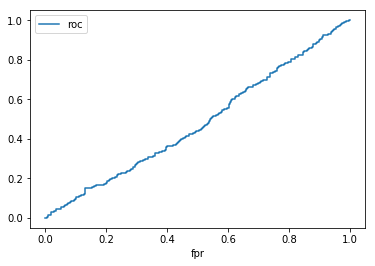

In [52]:
points = get_roc(y, y_pred)
df = pd.DataFrame(points, columns=["tpr", "fpr"])
print("AUC is %.3f." % get_auc(y, y_pred))
df.plot(x="fpr", y="tpr", label="roc")

### 10.2 AUC值为1，模型的预测能力最强

我们让预测值直接等于实际值

In [53]:
y_pred = np.array(y)

计算出ROC曲线的数据点，并绘制ROC曲线。不难看出这条ROC曲线的AUC值1，也就印证了AUC值为1，模型的预测能力最强的说法。当然，在实际应用时这种情况是几乎不可能出现的。

AUC is 1.000.


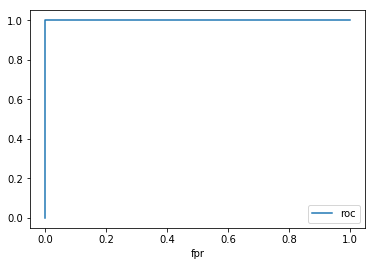

In [54]:
points = get_roc(y, y_pred)
df = pd.DataFrame(points, columns=["tpr", "fpr"])
print("AUC is %.3f." % get_auc(y, y_pred))
df.plot(x="fpr", y="tpr", label="roc")

### 10.3 对于正例和负例有着对等预测能力的ROC曲线

阈值为0.5时，我们让预测值有70%的可能性是正确预测。比如yi = 1，那么预测值有70%的可能性是[0.5, 1]之间的随机数。如果yi = 0，那么预测值有70%的可能性是[0, 0.5]之间的随机数

In [55]:
seed(15)
f = lambda x: rand() / 2 + 0.5 if x else rand() / 2
y_pred = np.array([f(yi) if rand() > 0.3 else f(1 - yi) for yi in y])

计算出ROC曲线的数据点，并绘制ROC曲线。可以看出ROC曲线的形状是对称的。

AUC is 0.706.


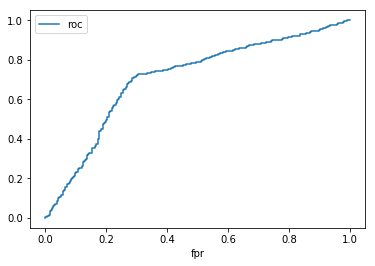

In [56]:
points = get_roc(y, y_pred)
df = pd.DataFrame(points, columns=["tpr", "fpr"])
print("AUC is %.3f." % get_auc(y, y_pred))
df.plot(x="fpr", y="tpr", label="roc")

### 10.4 对于正例有着较强预测能力的ROC曲线

阈值为0.5时，我们让正例的预测值有95%的可能性是正确预测，负例的预测值有70%的可能性是正确预测

In [57]:
seed(200)

def f(x):
    if x == 1:
        if rand() > 0.05:
            return rand() / 2 + 0.5
        else:
            return rand() / 2
    else:
        if rand() > 0.3:
            return rand() / 2
        else:
            return rand() / 2 + 0.5
        
y_pred = np.array([f(yi) for yi in y])

计算出ROC曲线的数据点，并绘制ROC曲线。可以看出ROC曲线的形状是偏上的。

AUC is 0.826.


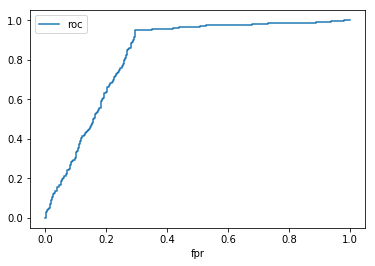

In [58]:
points = get_roc(y, y_pred)
df = pd.DataFrame(points, columns=["tpr", "fpr"])
print("AUC is %.3f." % get_auc(y, y_pred))
df.plot(x="fpr", y="tpr", label="roc")

### 10.5 对于负例有着较强预测能力的ROC曲线

阈值为0.5时，我们让正例的预测值有70%的可能性是正确预测，负例的预测值有95%的可能性是正确预测

In [59]:
seed(120)

def f(x):
    if x == 1:
        if rand() > 0.3:
            return rand() / 2 + 0.5
        else:
            return rand() / 2
    else:
        if rand() > 0.05:
            return rand() / 2
        else:
            return rand() / 2 + 0.5
        
y_pred = np.array([f(yi) for yi in y])

计算出ROC曲线的数据点，并绘制ROC曲线。可以看出ROC曲线的形状是偏左的。

AUC is 0.830.


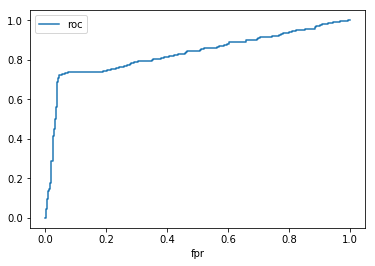

In [60]:
points = get_roc(y, y_pred)
df = pd.DataFrame(points, columns=["tpr", "fpr"])
print("AUC is %.3f." % get_auc(y, y_pred))
df.plot(x="fpr", y="tpr", label="roc")

### 10.6 预测值集中在0.5左右的ROC曲线
阈值为0.5时，我们让预测值有80%的可能性是正确预测，但值集中在0.5左右

In [62]:
seed(220)

def f(x):
    if x == 1:
        if rand() > 0.2:
            return rand() / 10 + 0.5
        else:
            return 0.5 - rand() / 10
    else:
        if rand() > 0.2:
            return 0.5 - rand() / 10
        else:
            return rand() / 10 + 0.5
        
y_pred = np.array([f(yi) for yi in y])

计算出ROC曲线的数据点，并绘制ROC曲线。

AUC is 0.804.


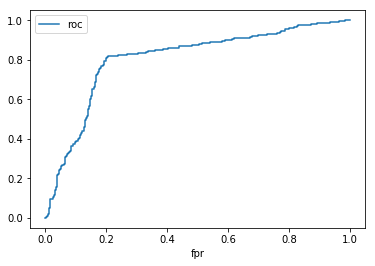

In [63]:
points = get_roc(y, y_pred)
df = pd.DataFrame(points, columns=["tpr", "fpr"])
print("AUC is %.3f." % get_auc(y, y_pred))
df.plot(x="fpr", y="tpr", label="roc")

### 10.7 预测值靠近1或0的ROC曲线
阈值为0.5时，我们让预测值有80%的可能性是正确预测，但值靠近1或0。

In [64]:
seed(50)

def f(x):
    if x == 1:
        if rand() > 0.2:
            return 1 - rand() / 10
        else:
            return rand() / 10
    else:
        if rand() > 0.2:
            return rand() / 10
        else:
            return 1 - rand() / 10
        
y_pred = np.array([f(yi) for yi in y])

计算出ROC曲线的数据点，并绘制ROC曲线。可以看出曲线跟10.6几乎没有差异，根据ROC曲线的定义不难思考出原因。

AUC is 0.812.


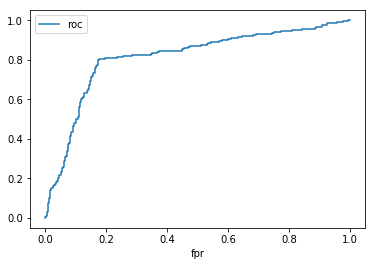

In [65]:
points = get_roc(y, y_pred)
df = pd.DataFrame(points, columns=["tpr", "fpr"])
print("AUC is %.3f." % get_auc(y, y_pred))
df.plot(x="fpr", y="tpr", label="roc")

### 10.8 预测值恒等于0.9的ROC曲线

In [66]:
y_pred = np.array([0.9] * len(y))

计算出ROC曲线的数据点，并绘制ROC曲线。发现预测值为定值的模型，ROC曲线是一条直线，AUC恒等于0.5。

AUC is 0.500.


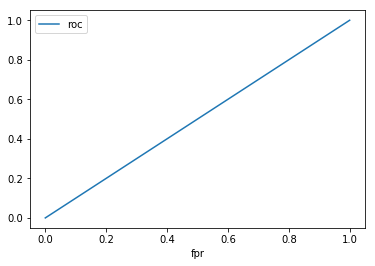

In [67]:
points = get_roc(y, y_pred)
df = pd.DataFrame(points, columns=["tpr", "fpr"])
print("AUC is %.3f." % get_auc(y, y_pred))
df.plot(x="fpr", y="tpr", label="roc")

### 利用notedown包将ipython notebook文件转为markdown文件
notedown classifier_evaluation.ipynb --to markdown --strip > classifier_evaluation.md